In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [9]:
import os

import torch
from torchvision import transforms
import mlflow

from evaluate import eval_model, evaluate_run, upload_test_results, DisplayResults
import _init_paths
from core.config import update_config, config
import dataset

In [5]:
temp_path = 'tmp'

default_config = '../experiments/coco/resnet152/384x288_d256x3_adam_lr1e-3_TrainingLoopDefault.yaml'

os.environ["MLFLOW_TRACKING_URI"] = "http://localhost:5000"
os.environ["MLFLOW_S3_ENDPOINT_URL"] = "http://localhost:9000"
mlflow.set_tracking_uri("http://localhost:5000")
# mlflow.set_registry_uri("http://localhost:9000")

In [6]:
update_config(default_config)

trans = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])


test_dataset = dataset.coco(
    config,
    '../data/tennis_test/',
    'test2017',
    False,
    trans
)

test_dataset.image_set = 't_est2017'

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=config.TEST.BATCH_SIZE,
    shuffle=False,
    num_workers=config.WORKERS,
    pin_memory=True
)

# MLFlow Uploading

In [14]:
experiment_id = '0'
runs = mlflow.search_runs(experiment_ids=experiment_id)
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.final_state AP M,metrics.valid_acc,metrics.final_state AR M,metrics.model_best AP L,...,params.NESTEROV,params.GAMMA1,params.train_set,params.BATCH_SIZE,params.WD,params.BEGIN_EPOCH,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.user,tags.mlflow.runName
0,49af7b584f03469d98c339245d5b2b23,0,FINISHED,s3://mlflow/0/49af7b584f03469d98c339245d5b2b23...,2024-01-16 08:50:30.225000+00:00,2024-01-16 11:39:42.658000+00:00,0.593038,0.516667,0.646875,0.463366,...,False,0.99,"[80, 68, 176, 82, 71, 87]",32,0.0001,0,LOCAL,/home/jfeil/.pyenv/versions/3.8.17/envs/DroneT...,jfeil,big-fish-675
1,081b42a460924120af77f6cee1a7782c,0,FINISHED,s3://mlflow/0/081b42a460924120af77f6cee1a7782c...,2024-01-16 02:38:15.066000+00:00,2024-01-16 11:40:04.256000+00:00,0.599661,0.620000,0.646875,0.431353,...,False,0.99,"[80, 68, 176, 81, 82, 71]",32,0.0001,0,LOCAL,/home/jfeil/.pyenv/versions/3.8.17/envs/DroneT...,jfeil,capable-yak-652
2,4102fec81ddb43388d80f85a9c5dae8d,0,FINISHED,s3://mlflow/0/4102fec81ddb43388d80f85a9c5dae8d...,2024-01-16 02:00:00.816000+00:00,2024-01-16 11:40:25.713000+00:00,0.595953,0.683333,0.645312,0.602970,...,False,0.99,"[80, 68, 176, 81, 82, 87]",32,0.0001,0,LOCAL,/home/jfeil/.pyenv/versions/3.8.17/envs/DroneT...,jfeil,debonair-donkey-985
3,e324650bc77c4fe89a711f8ea8a9b9a1,0,FINISHED,s3://mlflow/0/e324650bc77c4fe89a711f8ea8a9b9a1...,2024-01-16 01:24:27.189000+00:00,2024-01-16 11:40:47.305000+00:00,0.610327,0.493333,0.660937,0.241683,...,False,0.99,"[80, 68, 176, 81, 71, 87]",32,0.0001,0,LOCAL,/home/jfeil/.pyenv/versions/3.8.17/envs/DroneT...,jfeil,legendary-robin-453
4,5a6b507b1dbe41adaaf66b44c9a22188,0,FINISHED,s3://mlflow/0/5a6b507b1dbe41adaaf66b44c9a22188...,2024-01-15 22:29:26.472000+00:00,2024-01-16 11:41:08.650000+00:00,0.536924,0.390625,0.582812,0.504950,...,False,0.99,"[80, 68, 81, 82, 71, 87]",32,0.0001,0,LOCAL,/home/jfeil/.pyenv/versions/3.8.17/envs/DroneT...,jfeil,overjoyed-stoat-713
5,6675a328409b403ebfb11fcef2a3ded7,0,FINISHED,s3://mlflow/0/6675a328409b403ebfb11fcef2a3ded7...,2024-01-15 21:49:53.287000+00:00,2024-01-16 11:41:30.249000+00:00,0.597736,0.756771,0.646875,0.570957,...,False,0.99,"[80, 176, 81, 82, 71, 87]",32,0.0001,0,LOCAL,/home/jfeil/.pyenv/versions/3.8.17/envs/DroneT...,jfeil,dapper-grouse-577
6,8f0c57249e564b668d88138d783a6ca8,0,FINISHED,s3://mlflow/0/8f0c57249e564b668d88138d783a6ca8...,2024-01-15 21:16:27.087000+00:00,2024-01-16 11:41:51.766000+00:00,0.603574,0.613636,0.653906,0.615182,...,False,0.99,"[68, 176, 81, 82, 71, 87]",32,0.0001,0,LOCAL,/home/jfeil/.pyenv/versions/3.8.17/envs/DroneT...,jfeil,sassy-zebra-875


In [ ]:
for id_ in runs['run_id']:
    upload_test_results(id_, test_loader)

# Display Evaluation

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

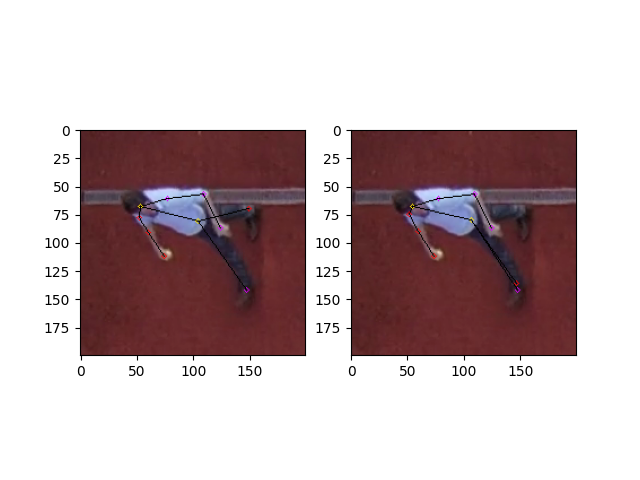

In [11]:
disp = DisplayResults('49af7b584f03469d98c339245d5b2b23', test_loader)
disp.display_fig()

In [12]:
disp.display_buttons()